In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pandas import Series,DataFrame
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
from sklearn import tree
from os import system
from sklearn import model_selection

%matplotlib inline

In [24]:
data=pd.read_csv('wine.xls',header=None)

In [25]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
data.columns=['Cultivator','Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoids','Proanth','Color','Hue','OD','Proline']

In [27]:
data.head(10)

,Cultivator,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonFlavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [29]:
#no null values
#refer to class notes for column descriptions
#almost all independant variables follow normal distribution
#except cultivator, every other column is continuous

In [30]:
data.shape

(178, 14)

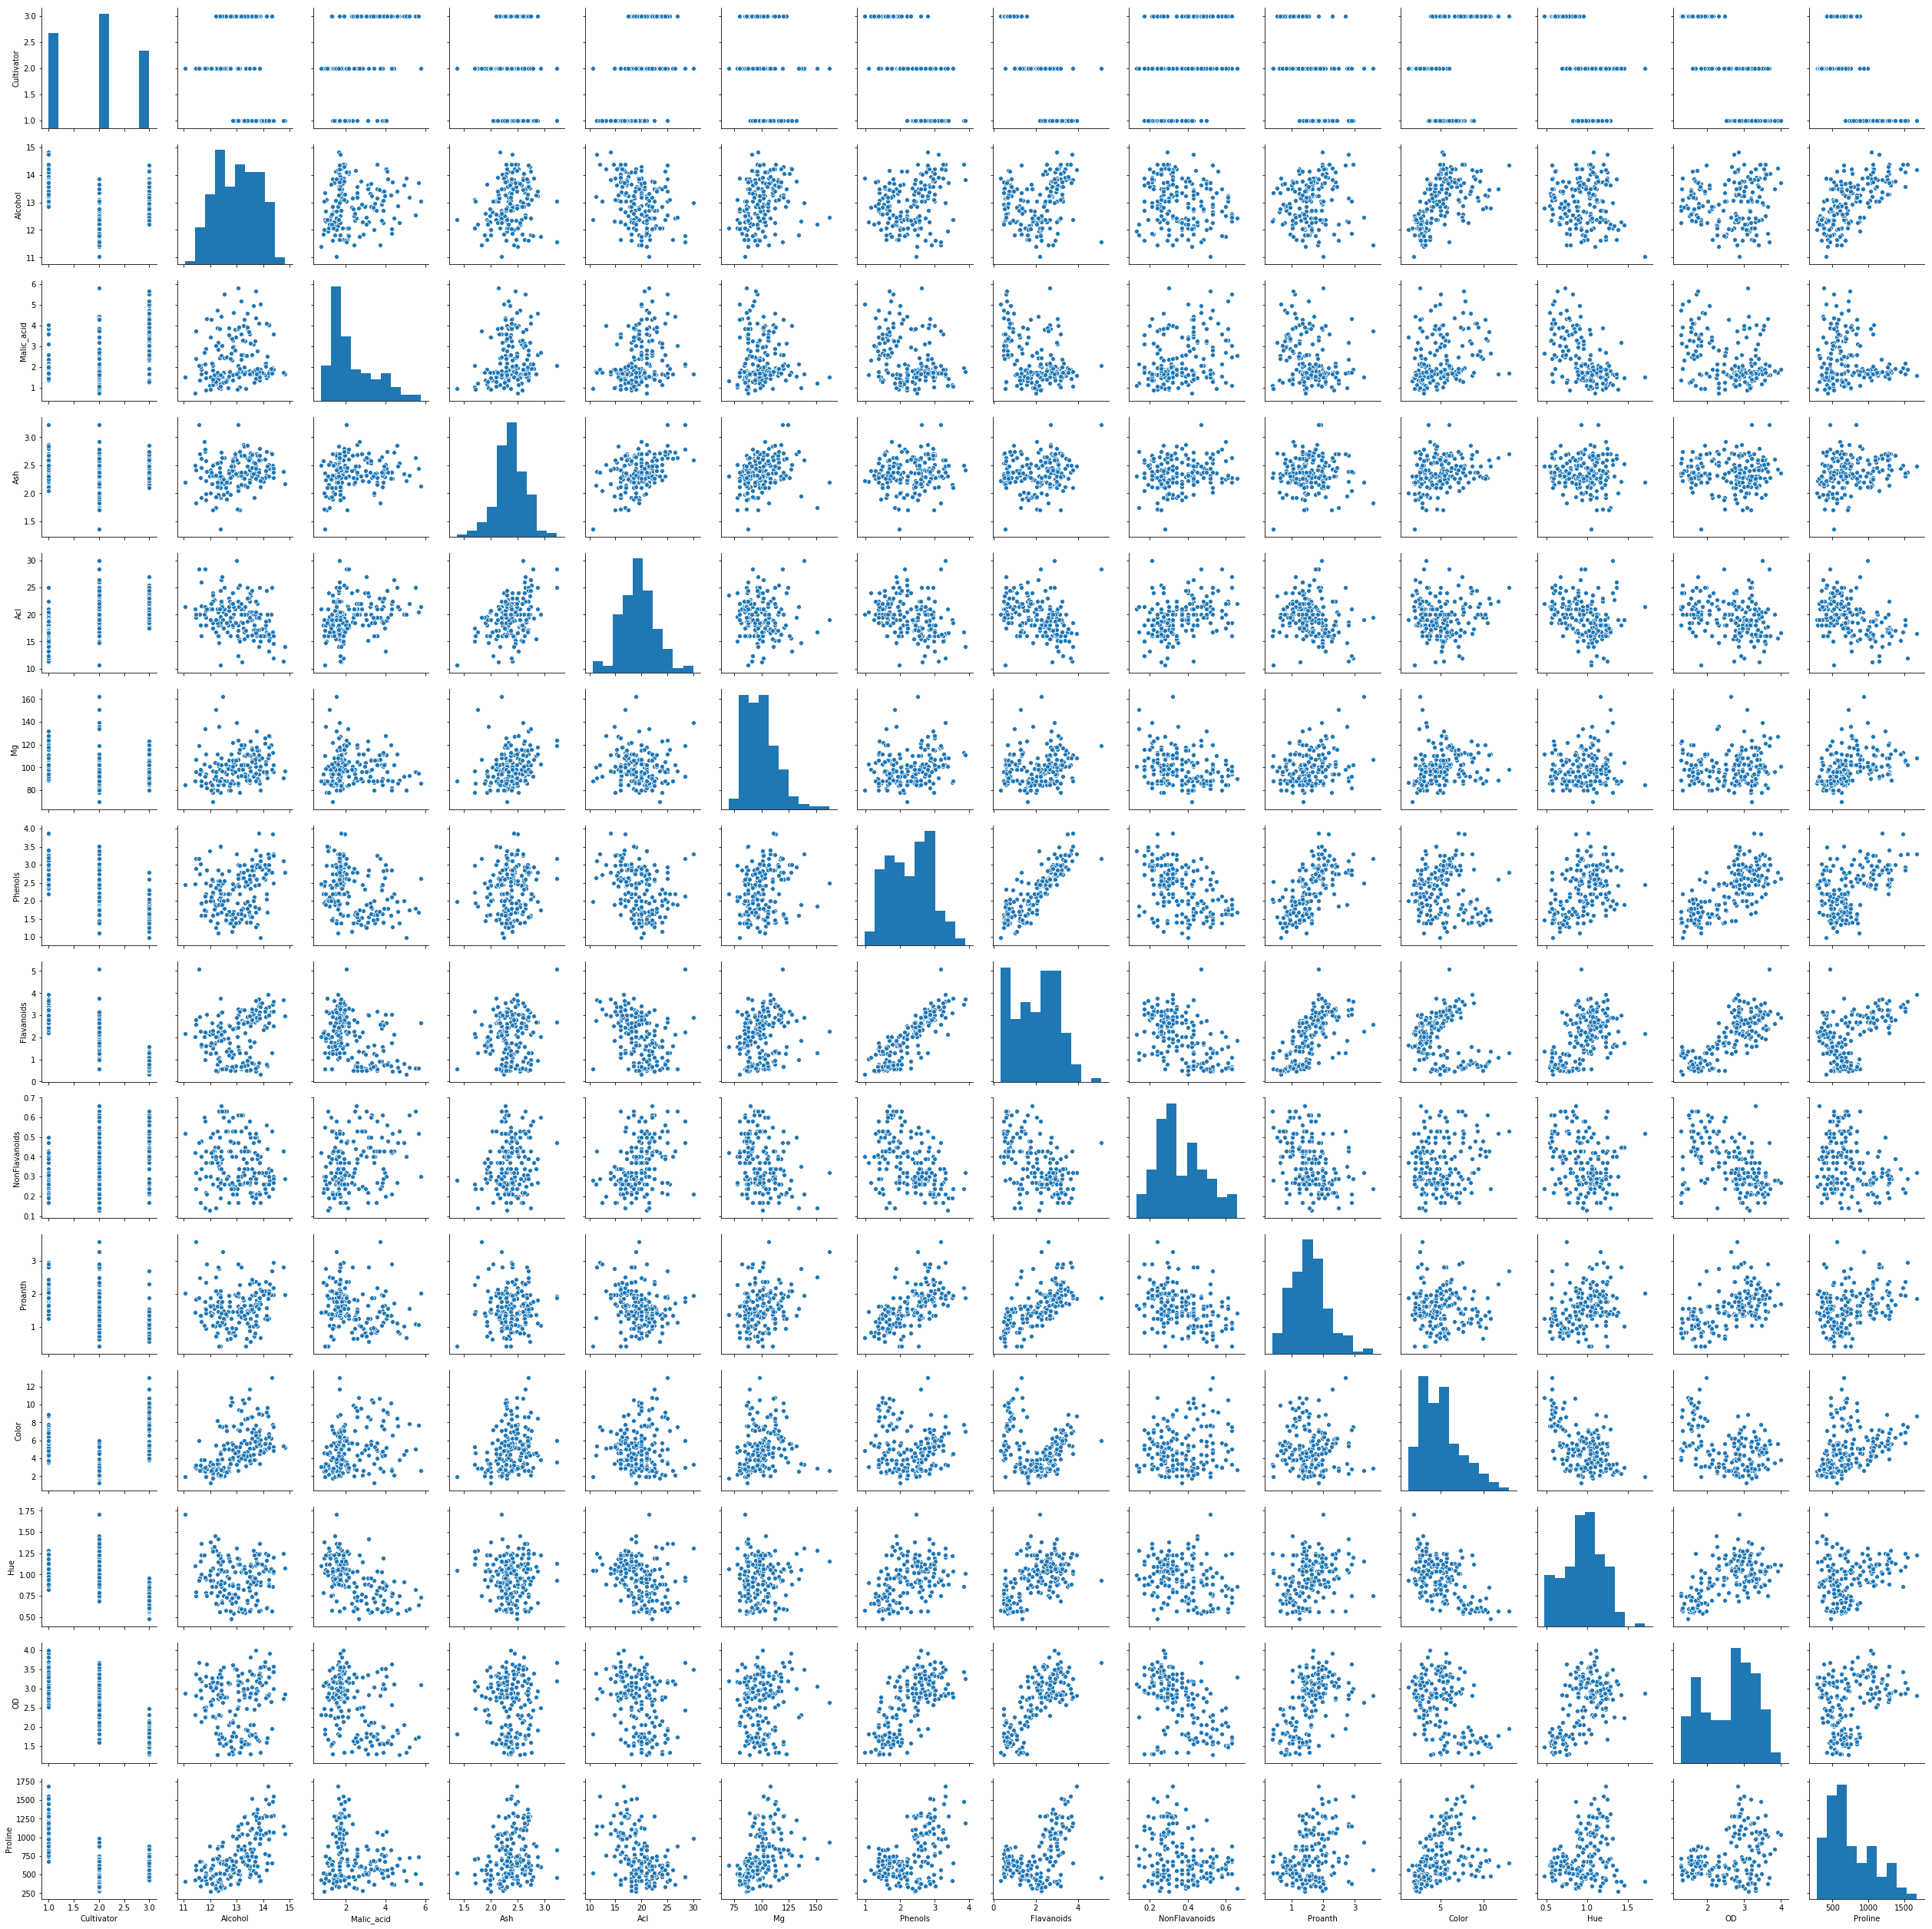

In [31]:
sns.pairplot(data)

In [32]:
data.corr()

,Cultivator,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,OD,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonFlavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [33]:
#X=data.iloc[:,[4,6,7,10,11,13]]
X=data.drop(labels='Cultivator',axis=1)
Y=data.Cultivator

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=2)
model=DecisionTreeClassifier(criterion='entropy',random_state=2,max_depth=3)
#max_depth = 3, refer next cell

model.fit(x_train,y_train)
y_pred=model.predict(x_test)
pd.crosstab(y_test,y_pred)

col_0,1,2,3
Cultivator,,,
1,19,1,0
2,3,17,0
3,0,4,10


In [35]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")             # to ignore warnings

p={'max_depth':np.arange(1,30)}
d=DecisionTreeClassifier(criterion='entropy',random_state=2 )
g=GridSearchCV(estimator=d,param_grid=p)
c={'cv':np.arange(2,10)}
g1=GridSearchCV(estimator=g,param_grid=c)
g1.fit(X,Y)
g1.best_params_ 

{'cv': 7}

In [36]:
metrics.accuracy_score(y_test,y_pred)

0.8518518518518519

In [37]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.86      0.95      0.90        20
           2       0.77      0.85      0.81        20
           3       1.00      0.71      0.83        14

   micro avg       0.85      0.85      0.85        54
   macro avg       0.88      0.84      0.85        54
weighted avg       0.87      0.85      0.85        54



# Random Forest

In [38]:
rf_data=pd.read_csv('wine.xls',header=None)
rf_data.columns=['Cultivator','Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoids','Proanth','Color','Hue','OD','Proline']



In [39]:
rf_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
NonFlavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [40]:
X=rf_data.drop(labels='Cultivator',axis=1)
Y=rf_data.Cultivator


In [41]:
x_std=StandardScaler().fit_transform(X)
xdf=DataFrame(x_std)
xdf.columns=X.columns
xdf.head()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [42]:
x_train,x_test,y_train,y_test=train_test_split(xdf,Y,test_size=0.3,random_state=2)
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [43]:
 metrics.accuracy_score(y_test,y_pred)

0.9629629629629629

In [44]:
x_train,x_test,y_train,y_test=train_test_split(xdf,Y,test_size=0.3,random_state=2)
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dt_model.fit(x_train,y_train)
y_pred1=dt_model.predict(x_test)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(xdf,Y,test_size=0.3,random_state=2)
rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [46]:
 metrics.accuracy_score(y_test,y_pred1)

0.8518518518518519

In [47]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))

In [48]:
models

[('DecisionTree',
  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=0,
              splitter='best')),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
              max_depth=3, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
              oob_score=False, random_state=0, verbose=0, warm_start=False))]

DecisionTree: 0.864921 (0.059962)
RandomForest: 0.898889 (0.073063)


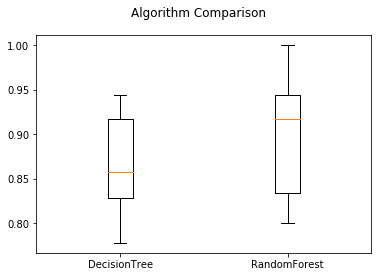

In [49]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))

results=[]
names=[]

scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ------------ Random Forest for wine data ends here  ------------

for pima dataset

In [50]:
pima_data=pd.read_csv('pima-indians-diabetes-1.data',header=None)
pima_data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
pima_data.columns=['PregnanciesNumber','GlucosePlasma','BloodPressureDiastolic','SkinThicknessTriceps','Insulin','BMI','DiabetesPedigreeFunctionDiabetes','Age','Outcome']

In [52]:
X=pima_data.drop(labels='Outcome',axis=1)
Y=pima_data.Outcome

In [53]:
x_std=StandardScaler().fit_transform(X)
xdf=DataFrame(x_std)
xdf.columns=X.columns
xdf.head()

,PregnanciesNumber,GlucosePlasma,BloodPressureDiastolic,SkinThicknessTriceps,Insulin,BMI,DiabetesPedigreeFunctionDiabetes,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [54]:
x_train,x_test,y_train,y_test=train_test_split(xdf,Y,test_size=0.3,random_state=2)
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dt_model.fit(x_train,y_train)
y_pred1=dt_model.predict(x_test)

rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

DecisionTree: 0.722656 (0.016927)
RandomForest: 0.739583 (0.031250)


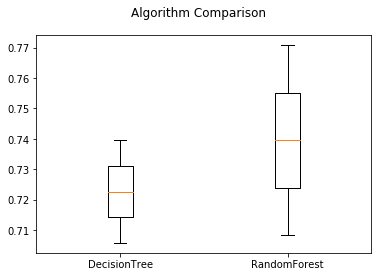

In [55]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))

results=[]
names=[]

scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=2,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Naive Bayes Algorithm

In [56]:
def gpdf(x,mean,sd):
    exp=np.exp(-1*(((x-mean)**2)/(2*sd**2)))
    return (1/((np.sqrt(2*(np.pi)))*sd))

In [57]:
c_age=[8,5,6,4,3]
c_height=[60,70,54,67,75]

a_age=[27,30,32,24,23]
a_height=[160,172,180,156,166]

m_ca=np.mean(c_age)
m_ch=np.mean(c_height)
s_ca=np.std(c_age)
s_ch=np.std(c_height)

m_aa=np.mean(a_age)
m_ah=np.mean(a_height)
s_aa=np.std(a_age)
s_ah=np.std(a_height)

In [58]:
print(m_ca,m_ch,m_aa,m_ah)

5.2 65.2 27.2 166.8


In [59]:
print(s_ca,s_ch,s_aa,s_ah)

1.7204650534085253 7.413501197140255 3.4292856398964493 8.541662601625049


In [60]:
#consider T[35,178]

In [61]:
gpdf(35,m_ca,s_ca)*gpdf(178,m_ch,s_ch)*0.5

0.006239085230058589

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [63]:
pima_data=pd.read_csv('pima-indians-diabetes-1.data',header=None)
pima_data.head()
pima_data.columns=['PregnanciesNumber','GlucosePlasma','BloodPressureDiastolic','SkinThicknessTriceps','Insulin','BMI','DiabetesPedigreeFunctionDiabetes','Age','Outcome']

X=pima_data.drop(labels='Outcome',axis=1)
Y=pima_data.Outcome

x_std=StandardScaler().fit_transform(X)
xdf=DataFrame(x_std)
xdf.columns=X.columns
xdf.head()

,PregnanciesNumber,GlucosePlasma,BloodPressureDiastolic,SkinThicknessTriceps,Insulin,BMI,DiabetesPedigreeFunctionDiabetes,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x_std,Y,test_size=0.3,random_state=2)
model=GaussianNB()
lr=LogisticRegression()
model.fit(x_train,y_train)
lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred1=lr.predict(x_test)

dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dt_model.fit(x_train,y_train)
y_pred2=dt_model.predict(x_test)

rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
rf_model.fit(x_train,y_train)
y_pred3=rf_model.predict(x_test)

DecisionTree: 0.748667 (0.061075)
RandomForest: 0.753879 (0.051287)
Logistic Regression: 0.779956 (0.050088)
Gaussian: 0.755178 (0.042766)


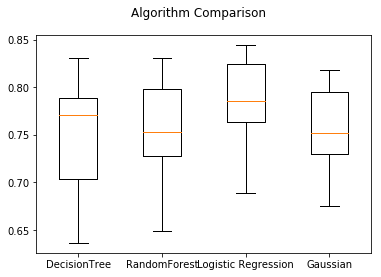

In [65]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))
models.append(('Logistic Regression',lr))
models.append(('Gaussian',model))

results=[]
names=[]

scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [66]:
p={'max_depth':np.arange(1,30)}
d=DecisionTreeClassifier(criterion='entropy',random_state=2 )
g=GridSearchCV(estimator=d,param_grid=p)
g.fit(x_std,Y)
g.best_params_

{'max_depth': 4}

In [67]:
rf_data=pd.read_csv('wine.xls',header=None)
rf_data.columns=['Cultivator','Alcohol','Malic_acid','Ash','Acl','Mg','Phenols','Flavanoids','NonFlavanoids','Proanth','Color','Hue','OD','Proline']

X=rf_data.drop(labels='Cultivator',axis=1)
Y=rf_data.Cultivator
x_std=StandardScaler().fit_transform(X)
xdf=DataFrame(x_std)
xdf.columns=X.columns
xdf.head()

,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,NonFlavanoids,Proanth,Color,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_std,Y,test_size=0.3,random_state=2)

model=GaussianNB()
lr=LogisticRegression()

model.fit(x_train,y_train)
lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred1=lr.predict(x_test)

dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=4)
dt_model.fit(x_train,y_train)
y_pred2=dt_model.predict(x_test)

rf_model=RandomForestClassifier(criterion='entropy',random_state=0,max_depth=4,n_estimators=40)
rf_model.fit(x_train,y_train)
y_pred3=rf_model.predict(x_test)

DecisionTree: 0.881905 (0.048117)
RandomForest: 0.921905 (0.053736)
Logistic Regression: 0.955397 (0.037611)
Gaussian: 0.932698 (0.028405)


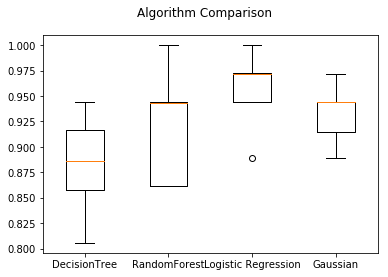

In [69]:
models=[]
models.append(('DecisionTree',dt_model))
models.append(('RandomForest',rf_model))
models.append(('Logistic Regression',lr))
models.append(('Gaussian',model))

results=[]
names=[]

scoring='accuracy'
for name,model in models:
    kfold=model_selection.KFold(n_splits=5,random_state=2)
    cv_results=model_selection.cross_val_score(model,x_std,Y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [71]:
p={'n_estimators':np.arange(1,30),'max_depth':np.arange(1,30)}
#p1={}
d=DecisionTreeClassifier(criterion='entropy',random_state=2 )
g=GridSearchCV(estimator=rf_model,param_grid=p)
g1=GridSearchCV(estimator=rf_model,param_grid=p)
g.fit(x_std,Y)
#g1.fit(x_std,Y)
print(g.best_params_)
g1.best_params_

{'max_depth': 4, 'n_estimators': 14}


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'